In [1]:
import json
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import json
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from tqdm import tqdm


# Root directory of the project
ROOT_DIR = os.path.abspath("../")

from scipy.ndimage.measurements import label

In [3]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000
Image.warnings.simplefilter('error', Image.DecompressionBombWarning)

In [4]:
# Set some parameters
IMG_WIDTH = 1800
IMG_HEIGHT = 1800
IMG_CHANNELS = 3
width_transform=1
height_transform=1

In [5]:
im_original = imread("C:/Users/jashj/Desktop/RA/export/V8j.jpg")

In [6]:
im_original.shape

(13390, 16110, 3)

In [7]:
img=im_original.copy()

In [8]:
resize_height=int(height_transform*img.shape[0])//IMG_HEIGHT + 1
#     resize_height

resize_width=int(width_transform*img.shape[1])//IMG_WIDTH + 1
#     resize_width


# X_test = np.zeros((resize_height*resize_width, IMG_HEIGHT, IMG_WIDTH,3))

# im = resize(img, (resize_height*IMG_HEIGHT, resize_width*IMG_WIDTH,3),  preserve_range=True)
# im = resize(img, (int(height_transform*img.shape[0]), int(width_transform*img.shape[1]),3),  preserve_range=True)

In [12]:
PATH="C:/Users/jashj/Desktop/RA/Human Annotation Analysis using QuPath/Segments_1800x1800_resized"

In [13]:
file_reference_id_name=[]
for i, filename in enumerate(os.listdir(PATH)):
#     print(i,filename)
    file_reference_id_name.append((i,filename))

In [14]:
file_reference_id_name

[(0, '0.jpg'),
 (1, '1.jpg'),
 (2, '10.jpg'),
 (3, '11.jpg'),
 (4, '12.jpg'),
 (5, '13.jpg'),
 (6, '14.jpg'),
 (7, '15.jpg'),
 (8, '16.jpg'),
 (9, '17.jpg'),
 (10, '18.jpg'),
 (11, '19.jpg'),
 (12, '2.jpg'),
 (13, '20.jpg'),
 (14, '21.jpg'),
 (15, '22.jpg'),
 (16, '23.jpg'),
 (17, '24.jpg'),
 (18, '25.jpg'),
 (19, '26.jpg'),
 (20, '27.jpg'),
 (21, '28.jpg'),
 (22, '29.jpg'),
 (23, '3.jpg'),
 (24, '30.jpg'),
 (25, '31.jpg'),
 (26, '32.jpg'),
 (27, '33.jpg'),
 (28, '34.jpg'),
 (29, '35.jpg'),
 (30, '36.jpg'),
 (31, '37.jpg'),
 (32, '38.jpg'),
 (33, '39.jpg'),
 (34, '4.jpg'),
 (35, '40.jpg'),
 (36, '41.jpg'),
 (37, '42.jpg'),
 (38, '43.jpg'),
 (39, '44.jpg'),
 (40, '45.jpg'),
 (41, '46.jpg'),
 (42, '47.jpg'),
 (43, '48.jpg'),
 (44, '49.jpg'),
 (45, '5.jpg'),
 (46, '50.jpg'),
 (47, '51.jpg'),
 (48, '52.jpg'),
 (49, '53.jpg'),
 (50, '54.jpg'),
 (51, '55.jpg'),
 (52, '56.jpg'),
 (53, '57.jpg'),
 (54, '58.jpg'),
 (55, '59.jpg'),
 (56, '6.jpg'),
 (57, '60.jpg'),
 (58, '61.jpg'),
 (59, '62.jpg'

In [17]:
# img_tile = imread(PATH+'/{}.jpg'.format(100))

In [18]:
# img_tile.shape

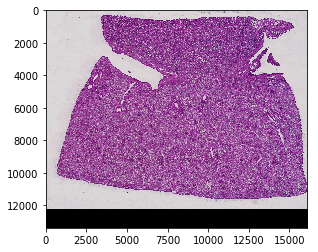

In [19]:
plt.imshow(img)

In [20]:
img.dtype

dtype('uint8')

In [21]:
X_test = np.zeros((resize_height*resize_width, IMG_HEIGHT, IMG_WIDTH,3),dtype='uint8')

In [22]:
X_test[0].shape

(1800, 1800, 3)

In [23]:
for i in tqdm(range(len(file_reference_id_name))):
    img = imread(PATH+'/{}.jpg'.format(i))
    X_test[i]=img

100%|██████████████████████████████████████████████████████████████████████████████████| 72/72 [00:04<00:00, 14.84it/s]


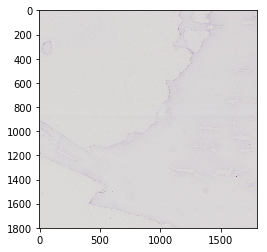

In [24]:
plt.imshow(X_test[0])

In [25]:
X_test[0].dtype

dtype('uint8')

In [26]:
X_test[0].shape

(1800, 1800, 3)

In [27]:
temp=cv2.imread('VAN0008j.jpg')

In [28]:
temp.shape

(13390, 16110, 3)

In [29]:
for h in tqdm(range(resize_height)):
    print('hello',(h*resize_width))
    first=X_test[h*resize_width]
    for w in tqdm(range(1,resize_width)):
        print((h*resize_width)+w)
        
        temp=X_test[(h*resize_width)+w]
        first=np.hstack((first,temp))
        
    if h==0:
        row=first.copy()
    else:
        row=np.vstack((row,first))
#     plt.imshow(first)

 38%|███████████████████████████████▌                                                    | 3/8 [00:00<00:00, 28.92it/s]

hello 0
1
2
3
4
5
6
7



  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

8
hello 9
10
11
12
13
14
15



  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

16
17
hello 18
19
20



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 36.62it/s]

21
22
23
24
25
26



 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:00<00:00, 48.21it/s]

hello 27
28
29
30
31
32
33
34
35



 75%|███████████████████████████████████████████████████████████████                     | 6/8 [00:00<00:00, 44.88it/s]

hello 36
37
38
39
40
41
42
43
44


 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:00<00:00, 49.15it/s]

hello 45
46
47
48
49
50
51
52
53



 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:00<00:00, 45.17it/s]

hello 54
55
56
57
58
59
60
61
62



 75%|███████████████████████████████████████████████████████████████                     | 6/8 [00:00<00:00, 44.89it/s]

hello 63
64
65
66
67
68
69
70
71


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.28it/s]


In [30]:
row.shape

(14400, 16200, 3)

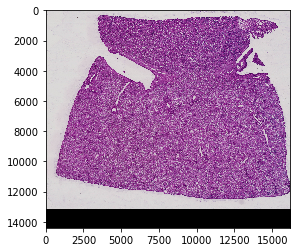

In [31]:
plt.imshow(row)

## Combining masked color images

In [33]:
X_color = np.zeros((resize_height*resize_width, 1024, 1024,3),dtype='uint8')

In [34]:
for i in tqdm(range(len(file_reference_id_name))):
    img = imread(PATH+'_maskresults/{}.jpg'.format(i))
    X_color[i]=img

100%|██████████████████████████████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 40.49it/s]


In [35]:
for h in tqdm(range(resize_height)):
    print('hello',(h*resize_width))
    first=X_color[h*resize_width]
    for w in tqdm(range(1,resize_width)):
        print((h*resize_width)+w)
        
        temp=X_color[(h*resize_width)+w]
        first=np.hstack((first,temp))
        
    if h==0:
        row=first.copy()
    else:
        row=np.vstack((row,first))
#     plt.imshow(first)

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

hello 0
1
2
3
4
5
6
7
8
hello 9
10
11
12
13
14
15


 38%|███████████████████████████████▌                                                    | 3/8 [00:00<00:00,  7.43it/s]

16
17
hello 18
19
20
21
22
23
24
25
26
hello 27



  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

28
29
30
31
32
33
34
35
hello 36
37
38
39
40
41
42
43
44


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

hello 45
46
47
48
49
50
51
52
53
hello 54
55
56
57
58


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

59
60
61
62
hello 63
64
65
66
67
68

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.69it/s]


69
70
71


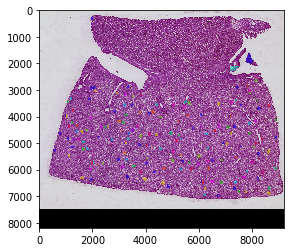

In [36]:
plt.imshow(row)

In [37]:
row_mask_color_complete=resize(row, (im_original.shape[0], im_original.shape[1],3),  preserve_range=True)

In [38]:
cv2.imwrite('Mask_color_complete.jpg',row)

True

In [39]:
cv2.imwrite('Mask_color_complete_resize.jpg',row_mask_color_complete)

True

# Combining 10224*1024 binary masks

In [47]:
X_binary=np.zeros((resize_height*resize_width, 1024, 1024),dtype='uint8')

In [48]:
B_PATH=PATH+'_results'

In [50]:
img = imread(B_PATH+'/{}.jpg'.format(i))

In [51]:
img.shape

(1024, 1024)

In [52]:
for i in tqdm(range(len(file_reference_id_name))):
    img = imread(B_PATH+'/{}.jpg'.format(i))
    X_binary[i]=img

100%|███████████████████████████████████████████████████████████████████████████████| 182/182 [00:01<00:00, 134.18it/s]


In [55]:
for h in tqdm(range(resize_height)):
    first=X_binary[h*resize_width]
    for w in tqdm(range(1,resize_width)):
        print((h*resize_width)+w)
        
        temp=X_binary[(h*resize_width)+w]
        first=np.hstack((first,temp))
        
    if h==0:
        row=first.copy()
    else:
        row=np.vstack((row,first))
#     plt.imshow(first)

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

hello 0
1
2
3
4
5
6
7
8
9
10
11
12
13
hello 14
15
16
17
18
19
20
21
22
23
24
25
26
27


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 183.59it/s]

100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 191.68it/s]

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

hello 28
29
30
31
32
33
34
35
36
37
38
39
40
41
hello 42
43
44
45
46
47
48
49
50
51
52
53
54
55
hello 56
57
58
59
60
61


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 220.93it/s]

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

62
63
64
65
66
67
68
69
hello 70
71
72
73
74
75
76
77
78
79
80
81
82
83
hello 84
85
86
87
88
89
90
91
92
93

100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 217.24it/s]

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]


94
95
96
97
hello 98
99
100
101
102
103
104
105
106
107
108
109
110
111
hello 112
113
114
115
116
117
118
119
120
121

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]


122
123
124
125
hello 126
127
128
129
130
131
132
133
134
135
136
137
138
139
hello 140
141
142
143
144
145


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 191.69it/s]


146
147
148
149
150
151
152
153
hello 154
155
156
157
158
159
160
161
162
163
164
165
166
167


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:01<00:00, 10.41it/s]

hello 168
169
170
171
172
173
174
175
176
177
178
179
180
181


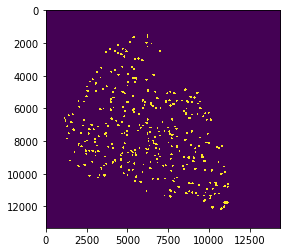

In [57]:
plt.imshow(row)

In [59]:
np.unique(row)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9, 246, 247, 248,
       249, 250, 251, 252, 253, 254, 255], dtype=uint8)

In [60]:
np.unique((row>0)*1)

array([0, 1])

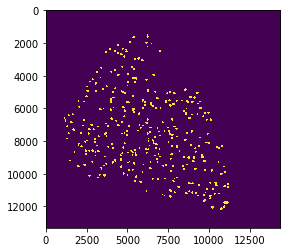

In [61]:
plt.imshow((row>0)*1)

In [62]:
row=(row>0)*1

In [63]:
Binary_mask_combined = resize(row, (im_original.shape[0], im_original.shape[1]),  preserve_range=True)

In [67]:
np.unique(Binary_mask_combined)

array([0.00000000e+00, 2.15019082e-08, 7.09562975e-07, ...,
       9.99998903e-01, 9.99999333e-01, 1.00000000e+00])

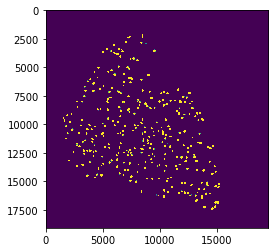

In [68]:
plt.imshow(Binary_mask_combined)

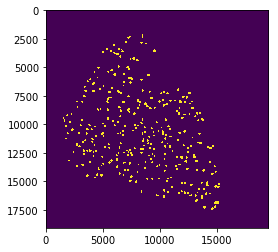

In [69]:
plt.imshow((Binary_mask_combined>0)*1)

In [70]:
Binary_mask_combined=(Binary_mask_combined>0)*255

In [71]:
np.unique(Binary_mask_combined)

array([  0, 255])

In [73]:
cv2.imwrite('Binary_mask_combined.jpg',Binary_mask_combined)

True

# Counting the number of islands

In [75]:
# Binary_mask_combined=Binary_mask_combined//255

In [76]:
np.unique(Binary_mask_combined)

array([  0, 255])

In [77]:
structure = np.ones((3, 3), dtype=np.int)

In [78]:
labeled_mask, ncomponents_mask = label(Binary_mask_combined, structure)

In [79]:
ncomponents_mask

309

In [94]:
kernel = np.ones((5,5),np.uint8)

In [95]:
Binary_mask_combined.shape

(19080, 19500)

In [96]:
np.unique(Binary_mask_combined)

array([  0, 255])

In [97]:
Binary_mask_combined.dtype

dtype('int32')

In [98]:
opening = cv2.morphologyEx(Binary_mask_combined.astype(np.uint8), cv2.MORPH_OPEN, kernel)

In [99]:
opening.shape

(19080, 19500)

In [100]:
np.unique(opening)

array([  0, 255], dtype=uint8)

In [101]:
opening.dtype

dtype('uint8')

In [102]:
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

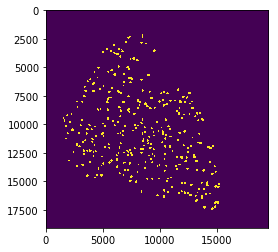

In [103]:
plt.imshow(closing)

In [104]:
np.unique(closing)

array([  0, 255], dtype=uint8)

In [105]:
labeled_closing, ncomponents_closing = label(closing, structure)

In [106]:
ncomponents_closing

306

In [107]:
cv2.imwrite('closing.jpg',closing)

True